# Home Work Assignment 1

**This is a group assignment.**

**Your home work assignment group will be same as your Kaggle group.**

**Team lead must submit answers to TA Arabinda Panda by mail.**

**There will be only one submission for a group**

**Use your group name for naming the file, e.g, HW_1_GRP12**

#Submission deadline: 5th September 2023, 23:59 hours

---



In [1]:
import tensorflow as tf
import numpy as np

Question1: Load data CIFAR10 from tensorflow keras

In [2]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


Question2: Split data into 80% train and 20% test

In [3]:
print(trainX.shape, testX.shape)
print("Already split in 80-20 shape")

print(np.unique(trainY))

(50000, 32, 32, 3) (10000, 32, 32, 3)
Already split in 80-20 shape
[0 1 2 3 4 5 6 7 8 9]


Question3: Use one-hot encoding to convert target variable Y into categorical vectors. i.e., apply one-hot encoding to trainY and testY.
Please refer to DNN Lab 2 jupyter notebook for similar task.  

In [4]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

print(trainY[0])
print(testY[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Question4: Plot (using matplotlib) two data points from trainX

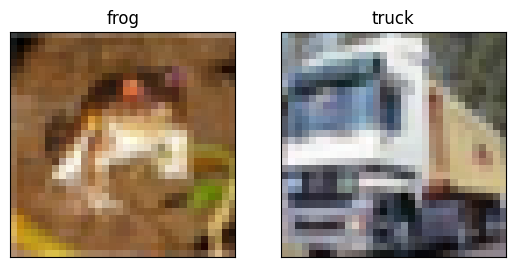

In [66]:
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2)
for (i, ax) in enumerate(axes.flatten()):
  ax.imshow(trainX[i])
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(CLASS_NAMES[trainY[i].argmax()])

Question5: Build a deep learning model with atleast 4 hidden layers and more than 100 hidden neurons to classify 10 classes of CIFAR10

Call this built model as **firstModel**

In [15]:
firstModel = tf.keras.models.Sequential();

firstModel.add(tf.keras.layers.Reshape((3072,),input_shape = (32,32,3)))
firstModel.add(tf.keras.layers.Dense(1000,activation="sigmoid"))
firstModel.add(tf.keras.layers.Dense(600,activation="sigmoid"))
firstModel.add(tf.keras.layers.Dense(300,activation="relu"))
firstModel.add(tf.keras.layers.Dense(100,activation="sigmoid"))
firstModel.add(tf.keras.layers.Dense(50,activation="relu"))
firstModel.add(tf.keras.layers.Dense(50,activation="sigmoid"))
firstModel.add(tf.keras.layers.Dense(20,activation="relu"))
firstModel.add(tf.keras.layers.Dense(10,activation="softmax"))

In [16]:
params = [
    {
        "batchSize" : 10,
        "epochs" : 10,
    },
    {
        "batchSize" : 10,
        "epochs" : 100,
    },
    {
        "batchSize" : 500,
        "epochs" : 100,
    },
     {
        "batchSize" : 500,
        "epochs" : 1000,
    },
     {
        "batchSize" : trainX.shape[0]//2,
        "epochs" : 10,
    },
     {
        "batchSize" : trainX.shape[0]//2,
        "epochs" : 100,
    },
     {
        "batchSize" : trainX.shape[0]//2,
        "epochs" : 500,
    },{
        "batchSize" : trainX.shape[0],
        "epochs" : 10,
    },
     {
        "batchSize" : trainX.shape[0],
        "epochs" : 100,
    },
     {
        "batchSize" : trainX.shape[0],
        "epochs" : 500,
    }
]

print(params)

columns = ["simulationNo","batchSize","epochs","trainingTime","trainAccuracy","testAccuracy"]

[{'batchSize': 10, 'epochs': 10}, {'batchSize': 10, 'epochs': 100}, {'batchSize': 500, 'epochs': 100}, {'batchSize': 500, 'epochs': 1000}, {'batchSize': 25000, 'epochs': 10}, {'batchSize': 25000, 'epochs': 100}, {'batchSize': 25000, 'epochs': 500}, {'batchSize': 50000, 'epochs': 10}, {'batchSize': 50000, 'epochs': 100}, {'batchSize': 50000, 'epochs': 500}]


In [17]:
# import pandas as pd

# solution = pd.DataFrame([],columns=columns)
# pd.concat(solution,pd.DataFrame([[0,10,10,0,0.9,0.1]],columns=columns),ignore_index=True)
# solution.head()
z = []

Question6: Present model accuracy with different batches sizes & epochs. Present results as follows:
$
 \begin{pmatrix}
  simulationNo & batchSize & epochs & trainingTime & trainAccuracy & testAccuracy \\
  1 & 10 & 10 &   &  &  \\
  2 & 10 & 100 &   &  & \\
  3 & 500 & 100 &   &  \\
  4 & 500 & 1000 &   &  \\
  5 & \frac{trainData size}{2} & 10 &   &  \\
  6 & \frac{trainData size}{2} & 100 &   & \\
  7 & \frac{trainData size}{2} & 500 &   & \\
  8 & trainData size & 10 &   &  \\
  9 & trainData size & 100 &   &  \\
  10 & trainData size & 500 &   &   
 \end{pmatrix}$

In [19]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.09)
firstModel.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy",metrics=["accuracy"])
for x in params:
  print(x)
  y = firstModel.fit(trainX,trainY,validation_data=(testX, testY),epochs=x["epochs"],batch_size=x["batchSize"])
  z.append(y)


{'batchSize': 10, 'epochs': 10}
Epoch 1/10
5000/5000 [==============================] - 20s 4ms/step - loss: 2.3048 - accuracy: 0.1043 - val_loss: 2.3037 - val_accuracy: 0.1005
Epoch 2/10
5000/5000 [==============================] - 20s 4ms/step - loss: 2.3052 - accuracy: 0.0990 - val_loss: 2.3044 - val_accuracy: 0.1004
Epoch 3/10
5000/5000 [==============================] - 19s 4ms/step - loss: 2.3048 - accuracy: 0.0997 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 4/10
5000/5000 [==============================] - 18s 4ms/step - loss: 2.3046 - accuracy: 0.0983 - val_loss: 2.3061 - val_accuracy: 0.1006
Epoch 5/10
5000/5000 [==============================] - 18s 4ms/step - loss: 2.3046 - accuracy: 0.0995 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 6/10
5000/5000 [==============================] - 18s 4ms/step - loss: 2.3042 - accuracy: 0.1007 - val_loss: 2.3040 - val_accuracy: 0.1002
Epoch 7/10
5000/5000 [==============================] - 19s 4ms/step - loss: 2.3042 - accuracy: 0.

In [79]:
z[0]

[0.1114799976348877,
 0.10858000069856644,
 0.10267999768257141,
 0.10372000187635422,
 0.1016400009393692,
 0.10890000313520432,
 0.11048000305891037,
 0.10245999693870544,
 0.10382000356912613,
 0.09989999979734421]

Question7: Plot testY[0] and testY[1]

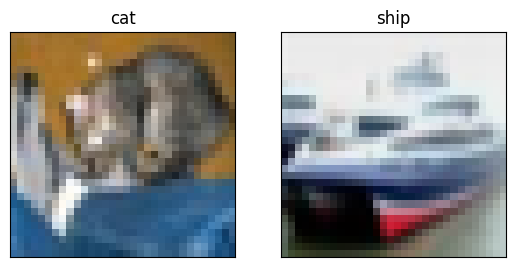

In [72]:
(fig,axes) = plt.subplots(1,2)
for i,ax in enumerate(axes.flatten()):
  ax.imshow(testX[i])
  ax.set_title(CLASS_NAMES[testY[i].argmax()])
  ax.set_xticks([])
  ax.set_yticks([])

Question8: Predict testY[0] and testY[1] class using **firstModel**

In [42]:
predictTest = firstModel.predict(testX)

313/313 [==============================] - 1s 2ms/step


In [63]:
print(f'The prediction for test dataset is {predictTest[0].argmax(), predictTest[1].argmax()}')
print(f'which belong to class {CLASS_NAMES[predictTest[0].argmax()], CLASS_NAMES[predictTest[1].argmax()]}')

The prediction for test dataset is (6, 8)
which belong to class ('frog', 'ship')


Question9: Compare prediction results with actual test images (refer to Question 7 for actual test images). Write down your observations.

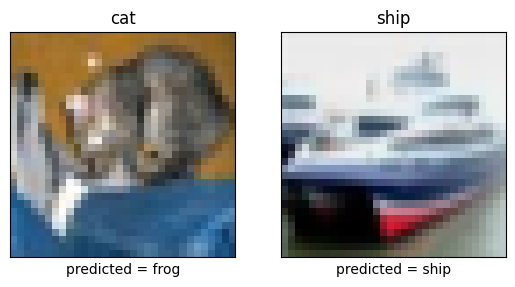

In [61]:
(fig,axes) = plt.subplots(1,2)
for i,ax in enumerate(axes.flatten()):
  ax.imshow(testX[i])
  ax.set_title(CLASS_NAMES[testY[i].argmax()])
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xlabel(f'predicted = {CLASS_NAMES[predictTest[i].argmax()]}')

Question10: Save your jupyter notebook(with your simulation results) and send to Arabinda Panda by email